In [171]:
import sys
sys.path.append("../")  # look one directory up for qca modules, TODO: make a package
from matrix import listkron, ops
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import expm
from states import make_state
from measures import get_rhoj, get_rhojk, get_expectation
hx = 5
hz = 20
J = 10
L = 9
T = 100

In [172]:
X, Z, ZZ = 0, 0, 0
for j in range(L):
    Xstr = ["I"]*L
    Zstr = ["I"]*L
    Xstr[j] = "X"
    Zstr[j] = "Z"
    X += listkron([ops[o] for o in Xstr])
    Z += listkron([ops[o] for o in Zstr])
    N = list(set([max(j-1, 0), min(L-1, j+1)]))
    N = [l for l in N if l!=j]
    print(N)
    for k in N:
        ZZstr = ["I"]*L
        ZZstr[j] = "Z"
        ZZstr[k] = "Z"
        ZZ += listkron([ops[o] for o in ZZstr])
H = hx * X + hz * Z + J/2 * ZZ
U = expm(-1j*H*0.05*np.pi)

[1]
[0, 2]
[1, 3]
[2, 4]
[3, 5]
[4, 6]
[5, 7]
[8, 6]
[7]


In [173]:
psi = make_state(L, "c1_f0")
psis = np.zeros((T+1, len(psi)), dtype=complex)
psis[0] = psi
for t in range(1, T+1):
    psi = U.dot(psi)
    psis[t] = psi

In [174]:
rhojs = np.array([get_rhoj(psi) for psi in psis])
Zexps = np.array([get_expectation(rhoj, ops["Z"]) for rhoj in rhojs])

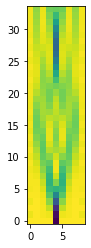

In [177]:
plt.imshow(Zexps[::3], origin="lower")